In [102]:
#Libraries for data loading and basic calculations
import numpy as np
import pandas as pd

#library for removing Warnings
import warnings as warn
warn.filterwarnings('ignore')

#library for distribution plot
import seaborn as sns

#Libraries for creating the Model 
import sklearn
from sklearn.model_selection import train_test_split

#Library for scaling
from sklearn.preprocessing import MinMaxScaler

#library for calculating R^2
from sklearn.metrics import r2_score


#Library for adding the constant
import statsmodels.api as sm

#Library for VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Read and understanding the data

In [32]:
BikeDemandFacts = pd.read_csv('day.csv')

In [33]:
BikeDemandFacts.shape

(730, 16)

In [34]:
BikeDemandFacts.head() #Top 5 records

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
BikeDemandFacts.info() #Checking for any null records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [45]:
#dteday and instant is not helping in infering any data hence droping the column
BikeDemandFacts = BikeDemandFacts.drop('dteday', axis=1)

BikeDemandFacts = BikeDemandFacts.drop('instant', axis=1)


In [46]:
BikeDemandFacts.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation

###### Working is derived holiday + weekday combination hence it can be derived and no need to working day column but I will take the call once Pvalue and VIF calculated

###### No need of dummy variables as there is no category variables



###### Splitting into Train & Test 

In [47]:
BikeDeamnd_train,BikeDeamnd_test = train_test_split(BikeDemandFacts,train_size=0.7,random_state=100)
# Check the total record count matching
print(BikeDeamnd_train.shape)
print(BikeDeamnd_test.shape) 

(510, 14)
(220, 14)


##### Rescaling of variables using Min-max scaling technique

In [48]:
scaler = MinMaxScaler()

#Create List of Numeric variables
Num_Vars = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','casual','registered']

#Fit on the data
BikeDeamnd_train[Num_Vars]=scaler.fit_transform(BikeDeamnd_train[Num_Vars])

#you can check the mentioned column values are adjusted between 0 and 1 by running decsribe commnad
BikeDeamnd_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.537440,0.513156,0.650480,0.320883,0.254689,0.523781,4485.337255
std,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.225858,0.212410,0.145846,0.169803,0.206015,0.227896,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,3120.000000
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.212740,0.525123,4530.000000
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000


In [49]:
BikeDeamnd_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,7216
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,4066
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,1796
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,4220
111,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,1683


## Train the model

##### Using the bottom-up approach

In [50]:
BikeDemandFacts.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [51]:
# Dividing into X and y set for building the model 
y_train = BikeDeamnd_train.pop('cnt')
X_train = BikeDeamnd_train


In [52]:
#Building the model with all the variables
X_train_with_const = sm.add_constant(X_train)

In [53]:
# Create Liner regression model
LinReg = sm.OLS(y_train,X_train_with_const)

#fit the model
lr_model = LinReg.fit()

In [54]:
#Checking the summary and params
#lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.795e+29
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:33:55   Log-Likelihood:                 11774.
No. Observations:                 510   AIC:                        -2.352e+04
Df Residuals:                     496   BIC:                        -2.346e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   7.66e-12   2.87e+12      0.000      22.000      22.000
season      3.183e-12   5.71e-12      0.557      0.578   -8.04e-12    1.44e-11
yr          4.661e-12   3.43e-12      1.361      0.174   -2.07e-12    1.14e-11
mnth        2.089e-12   6.32e-12      0.331      0.741   -1.03e-11    1.45e-11
holiday     2.274e-13   6.84e-12      0.033      0.973   -1.32e-11    1.37e-11
weekday      3.07e-12   3.13e-12      0.980      0.328   -3.09e-12    9.22e-12
workingday  2.956e-12   4.03e-12      0.733      0.464   -4.97e-12    1.09e-11
weathersit  3.411e-13   5.12e-12      0.067      0.947   -9.71e-12    1.04e-11
temp        8.185e-12   3.22e-11      0.254      0.800   -5.51e-11    7.15e-11
atemp      -4.547e-12   3.46e-11     -0.132      0.895   -7.24e-11    6.33e-11
hum         3.411e-12    9.6e-12      0.355      0.722   -1.54e-11    2.23e-11
windspeed    7.39e-13   6.81e-12      0.109      0.914   -1.26e-11    1.41e-11
casual      3281.0000   9.64e-12    3.4e+14      0.000    3281.000    3281.000
registered  6926.0000   1.14e-11   6.08e+14      0.000    6926.000    6926.000
==============================================================================
Omnibus:                       13.487   Durbin-Watson:                   0.062
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.063
Skew:                           0.315   Prob(JB):                      0.00240
Kurtosis:                       2.588   Cond. No.                         92.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF Calculation

In [55]:
VIF = pd.DataFrame()
VIF['Features'] = X_train.columns
VIF['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF

,Features,VIF
8,atemp,350.81
7,temp,335.63
12,registered,40.22
9,hum,16.62
2,mnth,13.39
0,season,12.15
5,workingday,10.05
11,casual,9.10
1,yr,5.70
10,windspeed,3.81


In [56]:
# Though the P value of holiday/weathersit/windspeed VIF values are compltely under 5% hence not considering to remove
# Next variable with both high values for P & VIF  are atemp hence checking by removing that variable
x_del_atemp= BikeDeamnd_train.drop('atemp', axis=1)


In [57]:
#Cretae another model by not considering atemp

In [58]:
X_train_with_const = sm.add_constant(x_del_atemp)
LinReg = sm.OLS(y_train,X_train_with_const)
lr_model = LinReg.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.320e+30
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:34:28   Log-Likelihood:                 12619.
No. Observations:                 510   AIC:                        -2.521e+04
Df Residuals:                     497   BIC:                        -2.516e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   1.46e-12   1.51e+13      0.000      22.000      22.000
season      -1.99e-12   1.09e-12     -1.825      0.069   -4.13e-12    1.52e-13
yr         -9.948e-13   6.52e-13     -1.526      0.128   -2.28e-12    2.86e-13
mnth         2.16e-12   1.21e-12      1.792      0.074   -2.08e-13    4.53e-12
holiday    -1.933e-12    1.3e-12     -1.482      0.139   -4.49e-12    6.29e-13
weekday    -1.194e-12   5.96e-13     -2.002      0.046   -2.37e-12   -2.22e-14
workingday -1.592e-12   7.69e-13     -2.069      0.039    -3.1e-12   -8.01e-14
weathersit  2.615e-12   9.76e-13      2.679      0.008    6.97e-13    4.53e-12
temp        1.819e-12   1.36e-12      1.337      0.182   -8.53e-13    4.49e-12
hum        -4.093e-12   1.82e-12     -2.244      0.025   -7.68e-12   -5.09e-13
windspeed    7.39e-13   1.28e-12      0.575      0.565   -1.79e-12    3.26e-12
casual      3281.0000   1.84e-12   1.78e+15      0.000    3281.000    3281.000
registered  6926.0000   2.17e-12    3.2e+15      0.000    6926.000    6926.000
==============================================================================
Omnibus:                        9.311   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.446
Skew:                          -0.141   Prob(JB):                       0.0398
Kurtosis:                       2.527   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#Recalculate VIF
VIF = pd.DataFrame()
VIF['Features'] = x_del_atemp.columns
VIF['VIF'] = [variance_inflation_factor(x_del_atemp.values,i) for i in range(x_del_atemp.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF

,Features,VIF
11,registered,39.90
7,temp,16.42
8,hum,15.92
2,mnth,13.39
0,season,12.15
5,workingday,10.05
10,casual,9.09
1,yr,5.67
9,windspeed,3.75
4,weekday,3.19


In [60]:
# Though windspeed is having high P value but VIF is completly less
# next variable with high values for the combination is temp

In [61]:
#Cretae another model by not considering atemp,temp
x_del_atemp_temp= x_del_atemp.drop('temp', axis=1)

In [62]:
#Cretae another model by not considering atemp,temp
X_train_with_const = sm.add_constant(x_del_atemp_temp)
LinReg = sm.OLS(y_train,X_train_with_const)
lr_model = LinReg.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.893e+30
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:35:42   Log-Likelihood:                 12218.
No. Observations:                 510   AIC:                        -2.441e+04
Df Residuals:                     498   BIC:                        -2.436e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   3.18e-12   6.91e+12      0.000      22.000      22.000
season       2.53e-12   2.39e-12      1.060      0.290   -2.16e-12    7.22e-12
yr         -5.471e-13   1.33e-12     -0.411      0.681   -3.16e-12    2.07e-12
mnth         1.89e-12   2.64e-12      0.716      0.474   -3.29e-12    7.07e-12
holiday     5.684e-13   2.85e-12      0.200      0.842   -5.03e-12    6.17e-12
weekday             0    1.3e-12          0      1.000   -2.56e-12    2.56e-12
workingday   2.16e-12   1.67e-12      1.297      0.195   -1.11e-12    5.43e-12
weathersit -1.251e-12   2.13e-12     -0.586      0.558   -5.44e-12    2.94e-12
hum         4.889e-12   3.91e-12      1.249      0.212    -2.8e-12    1.26e-11
windspeed  -2.274e-12   2.79e-12     -0.816      0.415   -7.75e-12     3.2e-12
casual      3281.0000   3.59e-12   9.14e+14      0.000    3281.000    3281.000
registered  6926.0000   4.43e-12   1.56e+15      0.000    6926.000    6926.000
==============================================================================
Omnibus:                       31.410   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.453
Skew:                           0.632   Prob(JB):                     2.00e-08
Kurtosis:                       2.731   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#Recalculate VIF
VIF = pd.DataFrame()
VIF['Features'] = x_del_atemp_temp.columns
VIF['VIF'] = [variance_inflation_factor(x_del_atemp_temp.values,i) for i in range(x_del_atemp_temp.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF

,Features,VIF
10,registered,35.00
7,hum,15.16
2,mnth,13.37
0,season,12.15
5,workingday,9.86
9,casual,7.27
1,yr,4.94
8,windspeed,3.70
4,weekday,3.16
6,weathersit,2.64


In [68]:
#Weekday is very high and P value quite negelegible where as mnth has considerable high values for p & VIF
#Hence lets validate the impact Week VS mnth
#Cretae another model by not considering atemp,temp,mnth
x_del_atemp_temp_mnth= x_del_atemp_temp.drop('mnth', axis=1)

#Cretae another model by not considering atemp,temp,mnth
X_train_with_const = sm.add_constant(x_del_atemp_temp_mnth)
LinReg = sm.OLS(y_train,X_train_with_const)
lr_model = LinReg.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.979e+29
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:52:51   Log-Likelihood:                 11900.
No. Observations:                 510   AIC:                        -2.378e+04
Df Residuals:                     499   BIC:                        -2.373e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   5.92e-12   3.71e+12      0.000      22.000      22.000
season      3.837e-12   2.72e-12      1.413      0.158    -1.5e-12    9.17e-12
yr          4.192e-13   2.48e-12      0.169      0.866   -4.46e-12     5.3e-12
holiday     1.478e-12   5.32e-12      0.278      0.781   -8.97e-12    1.19e-11
weekday    -2.842e-13   2.42e-12     -0.117      0.907   -5.05e-12    4.48e-12
workingday   4.32e-12   3.09e-12      1.398      0.163   -1.75e-12    1.04e-11
weathersit -1.023e-12   3.97e-12     -0.258      0.797   -8.82e-12    6.78e-12
hum         3.524e-12   7.27e-12      0.485      0.628   -1.08e-11    1.78e-11
windspeed  -4.547e-13    5.2e-12     -0.087      0.930   -1.07e-11    9.76e-12
casual      3281.0000   6.64e-12   4.94e+14      0.000    3281.000    3281.000
registered  6926.0000   8.27e-12   8.38e+14      0.000    6926.000    6926.000
==============================================================================
Omnibus:                       19.392   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.280
Skew:                           0.333   Prob(JB):                     0.000481
Kurtosis:                       2.476   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:

#Recalculate VIF
VIF = pd.DataFrame()
VIF['Features'] = x_del_atemp_temp_mnth.columns
VIF['VIF'] = [variance_inflation_factor(x_del_atemp_temp_mnth.values,i) for i in range(x_del_atemp_temp_mnth.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF


,Features,VIF
9,registered,34.91
6,hum,14.19
4,workingday,9.78
8,casual,7.17
1,yr,4.94
0,season,4.54
7,windspeed,3.68
3,weekday,3.13
5,weathersit,2.61
2,holiday,1.11


In [71]:
x_del_atemp_temp_Weekday= x_del_atemp_temp.drop('weekday', axis=1)
#Cretae another model by not considering atemp,temp,mnth
X_train_with_const = sm.add_constant(x_del_atemp_temp_Weekday)
LinReg = sm.OLS(y_train,X_train_with_const)
lr_model = LinReg.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.783e+30
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:57:33   Log-Likelihood:                 12178.
No. Observations:                 510   AIC:                        -2.433e+04
Df Residuals:                     499   BIC:                        -2.429e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   3.34e-12   6.59e+12      0.000      22.000      22.000
season     -9.379e-13   2.57e-12     -0.365      0.715   -5.98e-12    4.11e-12
yr          3.524e-12   1.43e-12      2.464      0.014    7.14e-13    6.33e-12
mnth        3.205e-12   2.84e-12      1.127      0.260   -2.38e-12    8.79e-12
holiday     3.411e-13   3.07e-12      0.111      0.912   -5.69e-12    6.37e-12
workingday  2.501e-12    1.8e-12      1.391      0.165   -1.03e-12    6.03e-12
weathersit  4.491e-12   2.28e-12      1.968      0.050     6.8e-15    8.97e-12
hum        -2.615e-12    4.2e-12     -0.622      0.534   -1.09e-11    5.65e-12
windspeed  -6.253e-13   3.01e-12     -0.208      0.836   -6.54e-12    5.29e-12
casual      3281.0000   3.88e-12   8.46e+14      0.000    3281.000    3281.000
registered  6926.0000   4.78e-12   1.45e+15      0.000    6926.000    6926.000
==============================================================================
Omnibus:                       36.605   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.545
Skew:                           0.088   Prob(JB):                      0.00115
Kurtosis:                       2.221   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#Recalculate VIF
VIF = pd.DataFrame()
VIF['Features'] = x_del_atemp_temp_Weekday.columns
VIF['VIF'] = [variance_inflation_factor(x_del_atemp_temp_Weekday.values,i) for i in range(x_del_atemp_temp_Weekday.shape[1])]
VIF['VIF'] = round(VIF['VIF'],2)
VIF = VIF.sort_values(by = 'VIF', ascending=False)
VIF

,Features,VIF
9,registered,34.67
6,hum,14.91
2,mnth,13.27
0,season,11.99
4,workingday,9.85
8,casual,7.20
1,yr,4.88
7,windspeed,3.55
5,weathersit,2.62
3,holiday,1.11


### Residual Analysis

In [76]:
y_train_predict = lr_model.predict(X_train_with_const)
y_train_predict

576    7216.0
426    4066.0
728    1796.0
482    4220.0
111    1683.0
        ...  
578    7261.0
53     1917.0
350    2739.0
79     2077.0
520    7001.0
Length: 510, dtype: float64

<Axes: ylabel='Density'>

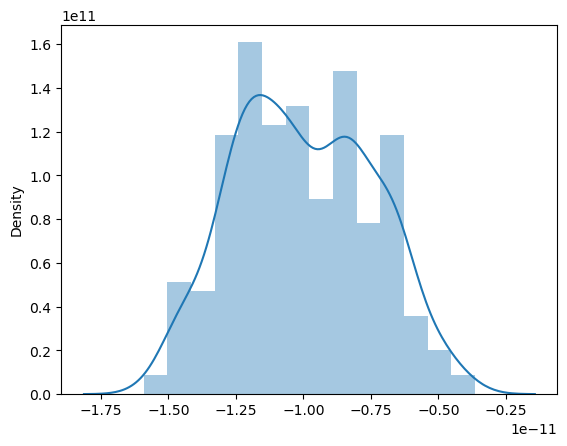

In [103]:
res = y_train - y_train_predict

#check for the model is distributed normally and centric from zero
sns.distplot(res)

### Prediction and Evolution of test set

In [91]:
#scaler = MinMaxScaler()

#Create List of Numeric variables
#Num_Vars = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','casual','registered']

#Fit on the data
BikeDeamnd_test[Num_Vars] = scaler.fit_transform(BikeDeamnd_test[Num_Vars])

#you can check the mentioned column values are adjusted between 0 and 1 by running decsribe commnad
BikeDeamnd_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.837241,0.778767,0.534223,0.149393,0.898559,0.397068,6043
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.911423,0.855132,0.470417,0.231142,0.253749,0.765284,6211
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.496221,0.492359,0.777843,0.443398,0.067921,0.309888,2659
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.890387,0.805661,0.236659,0.449707,0.257277,0.540237,4780
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.821739,0.749249,0.070765,0.682387,0.213761,0.592639,4968


In [92]:
BikeDeamnd_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.546074,0.530791,0.508362,0.418803,0.254977,0.507234,4560.559091
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.248645,0.227648,0.200875,0.187683,0.209104,0.236879,1904.968544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,441.000000
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.096810,0.323729,3312.750000
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.545492,0.543153,0.491299,0.403318,0.215231,0.505614,4582.500000
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.756414,0.719758,0.650989,0.523975,0.346957,0.656308,5913.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8395.000000


In [93]:
#Building the Test model
y_test = BikeDeamnd_test.pop('cnt')
X_test = BikeDeamnd_test

In [94]:
X_test_wit_Const = sm.add_constant(X_test)
X_test_wit_Const.head()

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
184,1.0,0.666667,0,0.545455,1,0.166667,0,0.5,0.837241,0.778767,0.534223,0.149393,0.898559,0.397068
535,1.0,0.333333,1,0.454545,0,0.500000,1,0.0,0.911423,0.855132,0.470417,0.231142,0.253749,0.765284
299,1.0,1.000000,0,0.818182,0,0.666667,1,0.5,0.496221,0.492359,0.777843,0.443398,0.067921,0.309888
221,1.0,0.666667,0,0.636364,0,0.500000,1,0.0,0.890387,0.805661,0.236659,0.449707,0.257277,0.540237
152,1.0,0.333333,0,0.454545,0,0.666667,1,0.0,0.821739,0.749249,0.070765,0.682387,0.213761,0.592639


In [95]:
X_test_wit_Const = X_test_wit_Const.drop(['atemp','temp','mnth'],axis=1)

In [96]:
#predict
y_test_predict = lr_model.predict(X_test_wit_Const)

In [100]:
#Evaluate using R^2
r2_score(y_true=y_test, y_pred=y_test_predict)

0.9865017463427207